In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = '/content/drive/MyDrive/Train'
test = '/content/drive/MyDrive/Test'

In [ ]:
IMAGE_SIZE = [224,224]  #BEST suited for resnet50 algorithm

In [ ]:
#initializing resnet 50 library
#weights used is imagenet
resnet = ResNet50(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)
                                           #3 channel             #as we are providing our own dataset in the top layer



94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
  layer.trainable = False   #not training our images

In [ ]:
from glob import glob
folders = glob('/content/drive/MyDrive/Train/*')   #to identify how many classes are present
folders

['/content/drive/MyDrive/Train/audi',
 '/content/drive/MyDrive/Train/lamborghini',
 '/content/drive/MyDrive/Train/mercedes']

In [ ]:
#Falttening our output for further ann step
x = layers.Flatten()(resnet.output)


In [ ]:
prediction = layers.Dense(len(folders),activation='softmax')(x)  #last layer of ann

#creating a model object
model = models.Model(inputs=resnet.input,outputs=prediction)
#input layer and output layer

In [ ]:
#compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#image generator reads the images from the folder and performs data augmentation

train_datagen = ImageDataGenerator( rescale=1./255,  #rescaled to /255 as we want our pixel values btw 0&1
                                   shear_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)   #image augmentation,

test_datagen = ImageDataGenerator(rescale = 1./255)  #test data is not to be augmented because we need to test it


In [ ]:
#reading the images in the train folder and resizing it
#basically applying all the data augmentation mentioned above
train_set = train_datagen.flow_from_directory(train,     #folder name
                                              target_size = (224,224),   #resize to 64x64
                                              batch_size=32,
                                              class_mode = 'categorical')  #categorical: as there are more than 3 classes
                                              #if 2 classes then use 'binary'

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
#Fitting the model:
f = model.fit_generator(
    train_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch = len(train_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
2/2 [==============================] - 45s 26s/step - loss: 4.6705 - accuracy: 0.4219 - val_loss: 10.7056 - val_accuracy: 0.1552
Epoch 2/10
2/2 [==============================] - 20s 14s/step - loss: 10.0682 - accuracy: 0.2500 - val_loss: 4.0354 - val_accuracy: 0.5172
Epoch 3/10
2/2 [==============================] - 20s 14s/step - loss: 2.5670 - accuracy: 0.4531 - val_loss: 7.7651 - val_accuracy: 0.3276
Epoch 4/10
2/2 [==============================] - 20s 14s/step - loss: 6.4593 - accuracy: 0.3906 - val_loss: 8.1668 - val_accuracy: 0.3276
Epoch 5/10
2/2 [==============================] - 22s 16s/step - loss: 4.7433 - accuracy: 0.3750 - val_loss: 5.7966 - val_accuracy: 0.1552
Epoch 6/10
2/2 [==============================] - 20s 14s/step - loss: 3.0878 - accuracy: 0.4062 - val_loss: 1.7222 - val_accuracy: 0.5690
Epoch 7/10
2/2 [==============================] - 20s 14s/step - loss: 2.5097 - accuracy: 0.4062 - val_loss: 2.1890 - val_accuracy: 0.5862
Epoch 8/10
2/2 [=========

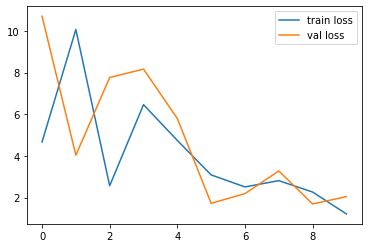

In [ ]:
#plotting the loss (training accuracy)
plt.plot(f.history['loss'],label='train loss')
plt.plot(f.history['val_loss'],label='val loss')
plt.legend()
plt.show()

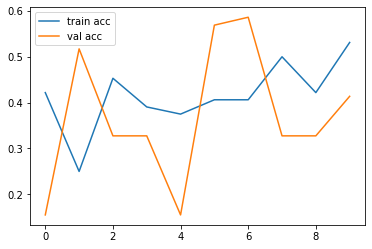

In [ ]:
#Testing accuracy:
plt.plot(f.history['accuracy'],label='train acc')
plt.plot(f.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('cnn_resnet50.h5')

In [ ]:
#checking the predictions:
y_pred = model.predict(test_set)
y_pred

2/2 [==============================] - 15s 5s/step


array([[7.73051381e-02, 9.18987393e-01, 3.70750157e-03],
       [7.91429341e-01, 2.07654476e-01, 9.16153775e-04],
       [5.71119726e-01, 4.28189695e-01, 6.90464280e-04],
       [9.08583283e-01, 8.96982402e-02, 1.71844417e-03],
       [6.63046122e-01, 3.35547894e-01, 1.40603387e-03],
       [5.12519360e-01, 4.84550387e-01, 2.93032383e-03],
       [3.35466743e-01, 6.63670123e-01, 8.63169145e-04],
       [7.28305578e-01, 2.71358997e-01, 3.35357443e-04],
       [4.23322737e-01, 5.75268269e-01, 1.40908279e-03],
       [9.67938364e-01, 3.14165354e-02, 6.45075575e-04],
       [9.36860979e-01, 6.10578395e-02, 2.08104867e-03],
       [3.92471641e-01, 6.06370628e-01, 1.15767599e-03],
       [4.94368106e-01, 1.09462425e-01, 3.96169424e-01],
       [2.91219592e-01, 7.05426872e-01, 3.35357594e-03],
       [5.35031438e-01, 4.63431805e-01, 1.53675780e-03],
       [1.13346092e-01, 8.86096776e-01, 5.57164836e-04],
       [1.15377210e-01, 8.55922878e-01, 2.86999010e-02],
       [8.95586252e-01, 8.95747

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1])